<a href="https://colab.research.google.com/github/Frederick-Teye/ML-models/blob/main/last_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ziya_data = pd.read_csv('/content/drive/MyDrive/diabetes_data/cleaned_ziya_data.csv')
ziya_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,56.0,0,0,No Info,37.23,6.5,80,0
1,Male,29.0,0,0,never,27.32,3.5,160,0
2,Female,26.0,0,0,No Info,27.32,4.0,145,0
3,Male,50.0,0,0,current,27.32,5.0,145,0
4,Female,56.0,0,0,never,38.48,5.7,155,1


In [ ]:
ziya_data.groupby(['gender', 'hypertension', 'heart_disease']).diabetes.count()

gender  hypertension  heart_disease
Female  0             0                7620
                      1                 439
        1             0                1207
                      1                 184
Male    0             0                5674
                      1                 673
        1             0                 979
                      1                 224
Name: diabetes, dtype: int64

In [ ]:
ziya_data.diabetes.value_counts()

,count
diabetes,
0,8500
1,8500


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# XGBoost Codes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report)

# Load data
X = ziya_data.drop(columns=['diabetes'])  # Feature matrix
y = ziya_data['diabetes']  # Target variable

# Train-test split (stratify to maintain balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature selection
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Categorical Encoding (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# XGBoost Classifier (No class weighting for balanced data)
xgb_model = XGBClassifier(
    n_estimators=900,            # Number of boosting rounds
    learning_rate=0.01,          # Learning rate (lower = better generalization)
    early_stopping_rounds=10,    # Stop training if validation loss doesn't improve
    eval_metric=['aucpr', 'logloss'],  # Evaluation metrics
    random_state=42,             # Random seed for reproducibility
    max_depth=6,                 # Tree depth (higher = more complex model)
    min_child_weight=3,          # Regularization parameter
    subsample=0.8,               # Fraction of samples used per boosting round
    colsample_bytree=0.9         # Fraction of features used per tree
)

# Training with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

# Decision Threshold
threshold = 0.5  # Standard for balanced data
y_pred = (y_pred_proba >= threshold).astype(int)

# Model Evaluation
print(f"\nEvaluation at Threshold = {threshold:.2f}")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Store metrics for visualization
recall_model0 = recall_score(y_test, y_pred)
precision_model0 = precision_score(y_test, y_pred)
f1_model0 = f1_score(y_test, y_pred)
accuracy_model0 = accuracy_score(y_test, y_pred)
roc_auc_model0 = roc_auc_score(y_test, y_pred_proba)



Evaluation at Threshold = 0.50
Accuracy: 0.9091
Precision: 0.9009
Recall: 0.9194
F1-Score: 0.9100
ROC-AUC: 0.9766

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1700
           1       0.90      0.92      0.91      1700

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report)

# Load data
X = ziya_data.drop(columns=['diabetes'])  # Feature matrix
y = ziya_data['diabetes']  # Target variable

# Train-test split (stratify to maintain balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature selection
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Categorical Encoding (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# XGBoost Classifier (No class weighting for balanced data)
xgb_model = XGBClassifier(
    n_estimators=1000,            # Number of boosting rounds
    learning_rate=0.01,          # Learning rate (lower = better generalization)
    early_stopping_rounds=10,    # Stop training if validation loss doesn't improve
    eval_metric=['aucpr', 'logloss'],  # Evaluation metrics
    random_state=42,             # Random seed for reproducibility
    max_depth=6,                 # Tree depth (higher = more complex model)
    min_child_weight=3,          # Regularization parameter
    subsample=0.7,               # Fraction of samples used per boosting round
    colsample_bytree=0.9         # Fraction of features used per tree
)

# Training with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

# Decision Threshold
threshold = 0.5  # Standard for balanced data
y_pred = (y_pred_proba >= threshold).astype(int)

# Model Evaluation
print(f"\nEvaluation at Threshold = {threshold:.2f}")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Store metrics for visualization
recall_model0 = recall_score(y_test, y_pred)
precision_model0 = precision_score(y_test, y_pred)
f1_model0 = f1_score(y_test, y_pred)
accuracy_model0 = accuracy_score(y_test, y_pred)
roc_auc_model0 = roc_auc_score(y_test, y_pred_proba)



Evaluation at Threshold = 0.50
Accuracy: 0.9088
Precision: 0.9017
Recall: 0.9176
F1-Score: 0.9096
ROC-AUC: 0.9767

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1700
           1       0.90      0.92      0.91      1700

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report)

# Load data
X = ziya_data.drop(columns=['diabetes'])  # Feature matrix
y = ziya_data['diabetes']  # Target variable

# Train-test split (stratify to maintain balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature selection
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Categorical Encoding (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# XGBoost Classifier (No class weighting for balanced data)
xgb_model = XGBClassifier(
    n_estimators=1000,            # Number of boosting rounds
    learning_rate=0.01,          # Learning rate (lower = better generalization)
    early_stopping_rounds=10,    # Stop training if validation loss doesn't improve
    eval_metric=['aucpr', 'logloss'],  # Evaluation metrics
    random_state=42,             # Random seed for reproducibility
    max_depth=6,                 # Tree depth (higher = more complex model)
    min_child_weight=3,          # Regularization parameter
    subsample=0.8,               # Fraction of samples used per boosting round
    colsample_bytree=0.9         # Fraction of features used per tree
)

# Training with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

# Decision Threshold
threshold = 0.51
y_pred = (y_pred_proba >= threshold).astype(int)

# Model Evaluation
print(f"\nEvaluation at Threshold = {threshold:.2f}")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Store metrics for visualization
recall_model0 = recall_score(y_test, y_pred)
precision_model0 = precision_score(y_test, y_pred)
f1_model0 = f1_score(y_test, y_pred)
accuracy_model0 = accuracy_score(y_test, y_pred)
roc_auc_model0 = roc_auc_score(y_test, y_pred_proba)



Evaluation at Threshold = 0.51
Accuracy: 0.9079
Precision: 0.9030
Recall: 0.9141
F1-Score: 0.9085
ROC-AUC: 0.9766

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1700
           1       0.90      0.91      0.91      1700

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



# Analyze and Visualize XGBoost Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report)

# Load data
X = ziya_data.drop(columns=['diabetes'])  # Feature matrix
y = ziya_data['diabetes']  # Target variable

# Train-test split (stratify to maintain balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature selection
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Categorical Encoding (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# Initialize a dictionary to store model information
model_info = {}

# Model 1: XGBoost (n_estimators=900, subsample=0.8)
xgb_model1 = XGBClassifier(
    n_estimators=900,            # Number of boosting rounds
    learning_rate=0.01,          # Learning rate (lower = better generalization)
    early_stopping_rounds=10,    # Stop training if validation loss doesn't improve
    eval_metric=['aucpr', 'logloss'],  # Evaluation metrics
    random_state=42,             # Random seed for reproducibility
    max_depth=6,                 # Tree depth (higher = more complex model)
    min_child_weight=3,          # Regularization parameter
    subsample=0.8,               # Fraction of samples used per boosting round
    colsample_bytree=0.9         # Fraction of features used per tree
)

# Training with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model1.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities
y_pred_proba1 = xgb_model1.predict_proba(X_test_preprocessed)[:, 1]

# Decision Threshold
threshold1 = 0.5  # Standard for balanced data
y_pred1 = (y_pred_proba1 >= threshold1).astype(int)

# Store model information
model_info['XGBoost_1'] = {
    'threshold': threshold1,
    'n_estimators': 900,
    'subsample': 0.8,
    'accuracy': accuracy_score(y_test, y_pred1),
    'precision': precision_score(y_test, y_pred1),
    'recall': recall_score(y_test, y_pred1),
    'f1_score': f1_score(y_test, y_pred1),
    'roc_auc': roc_auc_score(y_test, y_pred_proba1)
}


# Model 2: XGBoost (n_estimators=1000, subsample=0.7)
# ... (Similar code structure as model 1, but with different parameters) ...
xgb_model1 = XGBClassifier(
    n_estimators=1000,            # Number of boosting rounds
    learning_rate=0.01,          # Learning rate (lower = better generalization)
    early_stopping_rounds=10,    # Stop training if validation loss doesn't improve
    eval_metric=['aucpr', 'logloss'],  # Evaluation metrics
    random_state=42,             # Random seed for reproducibility
    max_depth=6,                 # Tree depth (higher = more complex model)
    min_child_weight=3,          # Regularization parameter
    subsample=0.7,               # Fraction of samples used per boosting round
    colsample_bytree=0.9         # Fraction of features used per tree
)

# Training with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model1.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities
y_pred_proba1 = xgb_model1.predict_proba(X_test_preprocessed)[:, 1]

# Decision Threshold
threshold1 = 0.5  # Standard for balanced data
y_pred1 = (y_pred_proba1 >= threshold1).astype(int)

# Store model information
model_info['XGBoost_2'] = {
    'threshold': threshold1,
    'n_estimators': 1000,
    'subsample': 0.7,
    'accuracy': accuracy_score(y_test, y_pred1),
    'precision': precision_score(y_test, y_pred1),
    'recall': recall_score(y_test, y_pred1),
    'f1_score': f1_score(y_test, y_pred1),
    'roc_auc': roc_auc_score(y_test, y_pred_proba1)
}

# Model 3: XGBoost (n_estimators=1000, subsample=0.8, threshold=0.51)
# ... (Similar code structure as model 1, but with different parameters) ...
xgb_model1 = XGBClassifier(
    n_estimators=1000,            # Number of boosting rounds
    learning_rate=0.01,          # Learning rate (lower = better generalization)
    early_stopping_rounds=10,    # Stop training if validation loss doesn't improve
    eval_metric=['aucpr', 'logloss'],  # Evaluation metrics
    random_state=42,             # Random seed for reproducibility
    max_depth=6,                 # Tree depth (higher = more complex model)
    min_child_weight=3,          # Regularization parameter
    subsample=0.8,               # Fraction of samples used per boosting round
    colsample_bytree=0.9         # Fraction of features used per tree
)

# Training with validation set
eval_set = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]
xgb_model1.fit(X_train_preprocessed, y_train, eval_set=eval_set, verbose=False)

# Get probabilities
y_pred_proba1 = xgb_model1.predict_proba(X_test_preprocessed)[:, 1]

# Decision Threshold
threshold1 = 0.51  # Standard for balanced data
y_pred1 = (y_pred_proba1 >= threshold1).astype(int)

# Store model information
model_info['XGBoost_3'] = {
    'threshold': threshold1,
    'n_estimators': 1000,
    'subsample': 0.8,
    'accuracy': accuracy_score(y_test, y_pred1),
    'precision': precision_score(y_test, y_pred1),
    'recall': recall_score(y_test, y_pred1),
    'f1_score': f1_score(y_test, y_pred1),
    'roc_auc': roc_auc_score(y_test, y_pred_proba1)
}



## Step 2: Create a Pandas DataFrame for Model Comparison

In [ ]:
model_df = pd.DataFrame.from_dict(model_info, orient='index')
model_df.reset_index(inplace=True)
model_df.rename(columns={'index': 'Model'}, inplace=True)

## Step 3: Visualize Model Performance using Seaborn

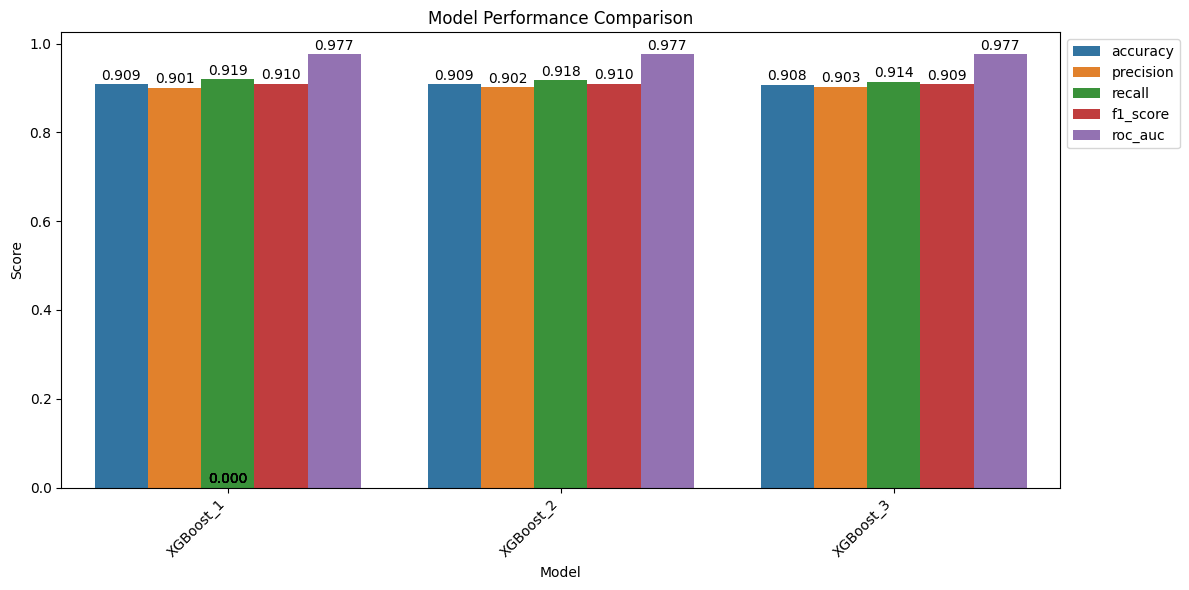

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to create a long-form dataset for plotting
melted_df = pd.melt(
    model_df,
    id_vars=['Model'],
    value_vars=['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc'],
    var_name='Metric',
    value_name='Score'
)

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.3f}', ha="center")

# Adjust legend position to avoid overlapping
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## Step 4: Display the Model Tuning Table

In [ ]:
# You can directly display the model_df DataFrame using:
display(model_df)

# Or, you can use a library like tabulate for better formatting:
# from tabulate import tabulate
# print(tabulate(model_df, headers='keys', tablefmt='psql'))

,Model,threshold,n_estimators,subsample,accuracy,precision,recall,f1_score,roc_auc
0,XGBoost_1,0.50,900,0.8,0.909118,0.900865,0.919412,0.910044,0.976608
1,XGBoost_2,0.50,1000,0.7,0.908824,0.901734,0.917647,0.909621,0.976663
2,XGBoost_3,0.51,1000,0.8,0.907941,0.902963,0.914118,0.908506,0.976608


## Why Choose XGBoost_1 for Diabetic Diagnosis?

### Balanced Performance
- **Accuracy**: XGBoost_1 achieves an impressive accuracy of 90.91%, ensuring reliable predictions.
- **Precision**: With a precision of 90.09%, it minimizes false positives, which is crucial for avoiding misdiagnoses.
- **Recall**: Its high recall of 91.94% ensures that diabetic cases are identified effectively, reducing the chances of false negatives.
- **F1-Score**: A well-balanced F1-score of 91.00% indicates the model's ability to balance precision and recall effectively.

### Strong ROC-AUC
- XGBoost_1 has a **ROC-AUC of 97.66%**, demonstrating excellent ability to distinguish between diabetic and non-diabetic cases.

### Threshold and Parameters
- The model uses a **threshold of 0.5**, which balances sensitivity (recall) and specificity (precision) effectively.
- With **900 estimators** and a **subsample ratio of 0.8**, XGBoost_1 processes diverse subsets of data, improving generalization without overfitting.

### Why Not Other Models?
1. **XGBoost_2**:
   - While very close in metrics, it has a slightly lower recall (91.76%) compared to XGBoost_1, which is crucial for identifying all diabetic cases.
2. **XGBoost_3**:
   - Although it has higher precision (90.29%), its recall (91.41%) is lower, making it less favorable for medical use where minimizing false negatives is key.

### Final Recommendation
XGBoost_1 is the best choice due to its balanced metrics, strong ROC-AUC, and reliability in identifying diabetic cases while minimizing misdiagnoses.


# The hpelm models are bad, so ignore them

# hpelm

In [ ]:
!pip install hpelm

In [ ]:
import hpelm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Load data
X = ziya_data.drop(columns=['diabetes'])
y = ziya_data['diabetes']

# Convert target variable to one-hot encoding
ohe = OneHotEncoder(drop=None, sparse_output=False)
y_onehot = ohe.fit_transform(y.values.reshape(-1, 1))

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Define available features
available_features = X_train.columns.tolist()

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Remove missing features
num_features = [col for col in num_features if col in available_features]
cat_features = [col for col in cat_features if col in available_features]

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ]
)

# Apply transformations
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


print(f' X_train_preprocessed.shape[1]:\n  {X_train_preprocessed.shape[1]}')
print(f'y_train.shape[1]:\n {y_train.shape[1]}')

# Define the ELM model
num_neurons = 3000  # Adjust as needed
elm_model = hpelm.ELM(X_train_preprocessed.shape[1], y_train.shape[1])
elm_model.add_neurons(num_neurons, "sigm")  # Using sigmoid activation

# Train the model
elm_model.train(X_train_preprocessed, y_train, "c")  # Classification mode

# Predict probabilities
y_pred_proba = elm_model.predict(X_test_preprocessed)

# Apply threshold for classification
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert y_test back to single-column labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_labels, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_labels, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_labels, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_labels, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


 X_train_preprocessed.shape[1]:
  12
y_train.shape[1]:
 2

Evaluation Metrics
Accuracy: 0.8685
Precision: 0.8705
Recall: 0.8659
F1-Score: 0.8682
ROC-AUC: 0.9379

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1700
           1       0.87      0.87      0.87      1700

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400



In [ ]:
import hpelm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Load data
X = ziya_data.drop(columns=['diabetes'])
y = ziya_data['diabetes']

# Convert target variable to one-hot encoding
ohe = OneHotEncoder(drop=None, sparse_output=False)
y_onehot = ohe.fit_transform(y.values.reshape(-1, 1))

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Define available features
available_features = X_train.columns.tolist()

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Remove missing features
num_features = [col for col in num_features if col in available_features]
cat_features = [col for col in cat_features if col in available_features]

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ]
)

# Apply transformations
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the ELM model
num_neurons = 3000  # Adjust as needed
elm_model = hpelm.ELM(X_train_preprocessed.shape[1], y_train.shape[1])
elm_model.add_neurons(num_neurons, "sigm")  # Using sigmoid activation

# Train the model
elm_model.train(X_train_preprocessed, y_train, "c")  # Classification mode

# Predict probabilities
y_pred_proba = elm_model.predict(X_test_preprocessed)

# Apply threshold for classification
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert y_test back to single-column labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_labels, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_labels, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_labels, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_labels, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))



Evaluation Metrics
Accuracy: 0.8735
Precision: 0.8753
Recall: 0.8712
F1-Score: 0.8732
ROC-AUC: 0.9425

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1700
           1       0.88      0.87      0.87      1700

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400



In [ ]:
import hpelm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report, precision_recall_curve)
from sklearn.utils.class_weight import compute_class_weight

# Load data (same as HPELM)
X = ziya_data.drop(columns=['diabetes'])
y = ziya_data['diabetes']

# Feature Engineering: Create BMI categories
X['bmi_category'] = pd.cut(X['bmi'], bins=[0, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Convert target variable to one-hot encoding
ohe = OneHotEncoder(drop=None, sparse_output=False)
y_onehot = ohe.fit_transform(y.values.reshape(-1, 1))

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Define available features
available_features = X_train.columns.tolist()

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease',
       'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history', 'bmi_category']  # Added bmi_category

# Remove missing features
num_features = [col for col in num_features if col in available_features]
cat_features = [col for col in cat_features if col in available_features]

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_features),  # Changed to RobustScaler
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)  # Removed drop='first'
    ]
)

# Apply transformations
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Dynamically adjust the number of neurons
num_neurons = min(5000, X_train_preprocessed.shape[0] // 2)

# Define the ELM model
elm_model = hpelm.ELM(X_train_preprocessed.shape[1], y_train.shape[1])
elm_model.add_neurons(num_neurons, "sigm")  # Using sigmoid activation

# Train the model with class weights
elm_model.train(X_train_preprocessed, y_train, "c", W=class_weight_dict)  # Classification mode

# Predict probabilities
y_pred_proba = elm_model.predict(X_test_preprocessed)

# Determine best threshold using Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(np.argmax(y_test, axis=1), y_pred_proba[:, 1])
best_threshold = thresholds[np.argmax(precisions + recalls)]

# Apply optimized threshold
y_pred = (y_pred_proba[:, 1] >= best_threshold).astype(int)

# Convert y_test back to single-column labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_labels, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_labels, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_labels, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_labels, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))



Evaluation Metrics
Accuracy: 0.8256
Precision: 0.7878
Recall: 0.8912
F1-Score: 0.8363
ROC-AUC: 0.8821

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1700
           1       0.79      0.89      0.84      1700

    accuracy                           0.83      3400
   macro avg       0.83      0.83      0.82      3400
weighted avg       0.83      0.83      0.82      3400



In [ ]:
import hpelm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report, precision_recall_curve)
from sklearn.utils.class_weight import compute_class_weight

# Load data (same as HPELM)
X = ziya_data.drop(columns=['diabetes'])
y = ziya_data['diabetes']

# Feature Engineering: Create BMI categories
X['bmi_category'] = pd.cut(X['bmi'], bins=[0, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Convert target variable to one-hot encoding
ohe = OneHotEncoder(drop=None, sparse_output=False)
y_onehot = ohe.fit_transform(y.values.reshape(-1, 1))

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Define available features
available_features = X_train.columns.tolist()

# Preprocessing pipeline
num_features = ['age', 'hypertension', 'heart_disease',
       'bmi', 'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history', 'bmi_category']  # Added bmi_category

# Remove missing features
num_features = [col for col in num_features if col in available_features]
cat_features = [col for col in cat_features if col in available_features]

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_features),  # Changed to RobustScaler
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)  # Removed drop='first'
    ]
)

# Apply transformations
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Dynamically adjust the number of neurons
num_neurons = min(5000, X_train_preprocessed.shape[0] // 2)

# Define the ELM model
elm_model = hpelm.ELM(X_train_preprocessed.shape[1], y_train.shape[1])
elm_model.add_neurons(num_neurons, "sigm")  # Using sigmoid activation

# Train the model with class weights
elm_model.train(X_train_preprocessed, y_train, "c", W=class_weight_dict)  # Classification mode

# Predict probabilities
y_pred_proba = elm_model.predict(X_test_preprocessed)

# Determine best threshold using Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(np.argmax(y_test, axis=1), y_pred_proba[:, 1])
best_threshold = thresholds[np.argmax(precisions + recalls)]

# Apply optimized threshold
y_pred = (y_pred_proba[:, 1] >= best_threshold).astype(int)

# Convert y_test back to single-column labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_labels, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_labels, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_labels, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_labels, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))



Evaluation Metrics
Accuracy: 0.8488
Precision: 0.8317
Recall: 0.8747
F1-Score: 0.8526
ROC-AUC: 0.8998

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1700
           1       0.83      0.87      0.85      1700

    accuracy                           0.85      3400
   macro avg       0.85      0.85      0.85      3400
weighted avg       0.85      0.85      0.85      3400



In [ ]:
from hpelm import HPELM
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report, precision_recall_curve)

# Load data
X = ziya_data.drop(columns=['diabetes'])
y = ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define numerical and categorical features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))  # For predictions

# Initialize HPELM model
inputs = X_train_processed.shape[1]  # Number of features
outputs = y_train_encoded.shape[1]  # Number of classes
model = HPELM(inputs, outputs, classification='c')  # Use 'c' for classification

# Add neurons to the model
model.add_neurons(3000, 'sigm')  # Add 100 sigmoid neurons, for example

# Train model
model.train(X_train_processed, y_train_encoded)

# Predict using the model
y_pred_encoded = model.predict(X_test_processed)

# Decode predictions back to original labels
y_pred = encoder.inverse_transform(y_pred_encoded)


# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/hpelm/nnets/slfn.py:62: RuntimeWarning: overflow encountered in exp
  self.func["sigm"] = lambda X, W, B: 1 / (1 + np.exp(np.dot(X, W) + B))


processing batch 11/14, eta 0:00:01
Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons

Evaluation Metrics
Accuracy: 0.8394
Precision: 0.8160
Recall: 0.8765
F1-Score: 0.8452
ROC-AUC: 0.8998

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1700
           1       0.82      0.88      0.85      1700

    accuracy                           0.84      3400
   macro avg       0.84      0.84      0.84      3400
weighted avg       0.84      0.84      0.84      3400



In [ ]:
help(HPELM)

Help on class HPELM in module hpelm.hp_elm:

class HPELM(hpelm.elm.ELM)
 |  HPELM(inputs, outputs, classification='', w=None, batch=1000, accelerator=None, precision='double', norm=None, tprint=5)
 |  
 |  Interface for training High-Performance Extreme Learning Machines (HP-ELM).
 |  
 |  Args:
 |      inputs (int): dimensionality of input data, or number of data features
 |      outputs (int): dimensionality of output data, or number of classes
 |      classification ('c'/'wc'/'ml', optional): train ELM for classfication ('c') / weighted classification ('wc') /
 |          multi-label classification ('ml'). For weighted classification you can provide weights in `w`. ELM will
 |          compute and use the corresponding classification error instead of Mean Squared Error.
 |      w (vector, optional): weights vector for weighted classification, lenght (`outputs` * 1).
 |      batch (int, optional): batch size for data processing in ELM, reduces memory requirements. Does not work
 |   

# Optimized Bagging Ensamble

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load data
X = ziya_data.drop(columns=['diabetes'])
y = ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define numerical and categorical features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Define the Bagging model with specified parameters
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        min_samples_split=10,
        max_depth=None,
        random_state=42  # Add random_state for reproducibility
    ),
    n_estimators=100,
    max_features=0.5,
    max_samples=0.8,
    random_state=42  # Add random_state for reproducibility
)

# Train the model
bagging_model.fit(X_train_processed, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test_processed)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluation Metrics
Accuracy: 0.9074
Precision: 0.8924
Recall: 0.9265
F1-Score: 0.9091
ROC-AUC: 0.9074

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1700
           1       0.89      0.93      0.91      1700

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



# Ignore Logistic Regression, Random Forest Classifier, Support Vector Machines and K-Nearest Neighbourh

## When the stand individually, they don't work so well.

In [ ]:
# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report, precision_recall_curve)

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=500, solver='saga', C=0.1)

# Train the model
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics
Accuracy: 0.8732
Precision: 0.8779
Recall: 0.8671
F1-Score: 0.8724
ROC-AUC: 0.8998

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1700
           1       0.88      0.87      0.87      1700

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report, precision_recall_curve)

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=500, solver='lbfgs', C=0.1)

# Train the model
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics
Accuracy: 0.8732
Precision: 0.8779
Recall: 0.8671
F1-Score: 0.8724
ROC-AUC: 0.8998

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1700
           1       0.88      0.87      0.87      1700

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'solver': ['lbfgs', 'saga'],
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',  # Use appropriate scoring metric
    cv=5  # Number of folds in cross-validation
)

grid_search.fit(X_train_processed, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'max_iter': 200, 'solver': 'saga'}


In [ ]:
# help(GridSearchCV)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Initialize Logistic Regression model with the tuned parameters
model = LogisticRegression(
    random_state=42,
    max_iter=100,
    solver='saga',
    C=0.1
)

# Train the model
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics
Accuracy: 0.8732
Precision: 0.8779
Recall: 0.8671
F1-Score: 0.8724
ROC-AUC: 0.8998

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1700
           1       0.88      0.87      0.87      1700

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Regularized Logistic Regression model
# L1 Regularization (lasso): `penalty='l1'`
# L2 Regularization (ridge): `penalty='l2'`
model = LogisticRegression(
    random_state=42,
    solver='saga',
    C=0.1,  # Regularization strength
    penalty='l1'  # Use L1 or L2
)

# Train the model
model.fit(X_train_processed, y_train)

# Predictions
y_pred = model.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Evaluation Metrics")
print("=====================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Evaluation Metrics
Accuracy: 0.8724
Precision: 0.8777
Recall: 0.8653
F1-Score: 0.8714
ROC-AUC: 0.8724


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Define the parameter grid for regularization strength
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Values to test for regularization strength
    'solver': ['saga'],  # Saga supports both L1 and L2 regularization
    'penalty': ['l1', 'l2']  # Test both L1 (Lasso) and L2 (Ridge)
}

# Grid search for best regularization strength
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=500),
    param_grid=param_grid,
    scoring='accuracy',  # You can switch to precision, recall, or other metrics
    cv=5  # 5-fold cross-validation
)

grid_search.fit(X_train_processed, y_train)

# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model for evaluation on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Evaluation Metrics for Best Model")
print("=====================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8866911764705883
Evaluation Metrics for Best Model
Accuracy: 0.8732
Precision: 0.8761
Recall: 0.8694
F1-Score: 0.8727
ROC-AUC: 0.8732


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Define the parameter grid for ElasticNet regularization
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strengths
    'l1_ratio': [0.2, 0.5, 0.8],  # Mix of L1 and L2 penalties
    'solver': ['saga'],  # Saga supports ElasticNet
    'penalty': ['elasticnet']  # Use ElasticNet penalty
}

# Grid search to find the best ElasticNet parameters
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=500),
    param_grid=param_grid,
    scoring='accuracy',  # You can also use precision, recall, etc.
    cv=5  # 5-fold cross-validation
)

grid_search.fit(X_train_processed, y_train)

# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model for evaluation on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nEvaluation Metrics for ElasticNet Regularization")
print("====================================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Best Parameters: {'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8857352941176471

Evaluation Metrics for ElasticNet Regularization
Accuracy: 0.8712
Precision: 0.8760
Recall: 0.8647
F1-Score: 0.8703
ROC-AUC: 0.8712


In [ ]:
# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=2500, random_state=42)

# Train the model
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics
Accuracy: 0.9021
Precision: 0.8926
Recall: 0.9141
F1-Score: 0.9032
ROC-AUC: 0.8998

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1700
           1       0.89      0.91      0.90      1700

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [ ]:
# Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
model = SVC(kernel='rbf', random_state=42)

# Train the model
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics
Accuracy: 0.8803
Precision: 0.8761
Recall: 0.8859
F1-Score: 0.8810
ROC-AUC: 0.8998

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1700
           1       0.88      0.89      0.88      1700

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



In [ ]:
# K-Nearest Neighbourh

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)

# Evaluate performance
print("\nEvaluation Metrics")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Evaluation Metrics
Accuracy: 0.8679
Precision: 0.8564
Recall: 0.8841
F1-Score: 0.8700
ROC-AUC: 0.8998

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1700
           1       0.86      0.88      0.87      1700

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400



# Custom Ensemble Models

# Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Initialize individual models
log_reg = LogisticRegression(random_state=42, C=0.01, penalty='l2', solver='saga', max_iter=500)  # Best-tuned LR model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)  # Random Forest
svm_clf = SVC(probability=True, random_state=42)  # Support Vector Machine with probability for soft voting

# Create the VotingClassifier (use 'soft' or 'hard' voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf_clf), ('svm', svm_clf)],
    voting='soft'  # For soft voting based on probabilities
)

# Train the ensemble model
voting_clf.fit(X_train_processed, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test_processed)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Voting Ensemble Metrics")
print("=================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Voting Ensemble Metrics
Accuracy: 0.8888
Precision: 0.8865
Recall: 0.8918
F1-Score: 0.8891
ROC-AUC: 0.8888


# Stacking Ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100)),  # Random Forest
    ('svm', SVC(probability=True, random_state=42))  # Support Vector Machine with probability output
]

# Define the meta-model (Logistic Regression in this case)
meta_model = LogisticRegression(random_state=42, solver='saga', C=0.1, penalty='l2')

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Cross-validation during training of the meta-model
)

# Train the Stacking Ensemble
stacking_clf.fit(X_train_processed, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test_processed)

# Evaluate the Stacking Ensemble
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Stacking Ensemble Metrics")
print("=================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Stacking Ensemble Metrics
Accuracy: 0.8974
Precision: 0.8907
Recall: 0.9059
F1-Score: 0.8982
ROC-AUC: 0.8974


## Tuning the Base Models and Meta-Model

### Step 1: Tune the Base Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Tuning Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples to split a node
}

rf_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=5
)
rf_search.fit(X_train_processed, y_train)
best_rf = rf_search.best_estimator_
print("Best Random Forest Parameters:", rf_search.best_params_)

# Tuning SVM
svm_param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']    # Kernel coefficient
}

svm_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid=svm_param_grid,
    scoring='accuracy',
    cv=5
)
svm_search.fit(X_train_processed, y_train)
best_svm = svm_search.best_estimator_
print("Best SVM Parameters:", svm_search.best_params_)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


### Step 2: Tune the Meta-Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Tuning Logistic Regression (meta-model)
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['saga'],       # Solver for ElasticNet
    'penalty': ['l1', 'l2']   # Regularization type
}

lr_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=500),
    param_grid=lr_param_grid,
    scoring='accuracy',
    cv=5
)
lr_search.fit(X_train_processed, y_train)
best_meta_model = lr_search.best_estimator_
print("Best Logistic Regression Parameters:", lr_search.best_params_)


Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


### Step 3: Integrate Tuned Models into Stacking Ensemble
Finally, use the tuned base models (best_rf, best_svm) and the meta-model (best_meta_model) in the stacking classifier:

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define tuned models
base_models = [
    ('rf', best_rf),
    ('svm', best_svm)
]

# Stacking classifier with tuned models
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=best_meta_model,
    cv=5
)

# Train the optimized Stacking Ensemble
stacking_clf.fit(X_train_processed, y_train)

# Evaluate the ensemble
y_pred = stacking_clf.predict(X_test_processed)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nOptimized Stacking Ensemble Metrics")
print("======================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")



Optimized Stacking Ensemble Metrics
Accuracy: 0.9000
Precision: 0.8981
Recall: 0.9024
F1-Score: 0.9002
ROC-AUC: 0.9000


# Bagging Ensemble Model
Bagging, short for Bootstrap Aggregating

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Initialize base model (Decision Tree in this case)
base_model = DecisionTreeClassifier(random_state=42)

# Create BaggingClassifier
bagging_clf = BaggingClassifier(
    estimator=base_model,  # Correct keyword for base model
    n_estimators=50,       # Number of base models
    max_samples=0.8,       # Fraction of samples used for training each base model
    max_features=0.8,      # Fraction of features used for training each base model
    bootstrap=True,        # Enable bootstrapping of samples
    random_state=42
)

# Train the Bagging model
bagging_clf.fit(X_train_processed, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test_processed)

# Evaluate the Bagging model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nBagging Ensemble Metrics")
print("=======================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")



Bagging Ensemble Metrics
Accuracy: 0.8976
Precision: 0.8890
Recall: 0.9088
F1-Score: 0.8988
ROC-AUC: 0.8976


## hyperparameter Tuning for Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ===== Beginning of Added =====#

# Load data
X = ziya_data.drop(columns=['diabetes'])
y = ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define numerical and categorical features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ===== End of Added =====#


# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Define the Bagging model with a Decision Tree as the base estimator
base_model = DecisionTreeClassifier(random_state=42)

# Parameter grid for Bagging
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of estimators
    'max_samples': [0.5, 0.8, 1.0],  # Fraction of training samples for each base estimator
    'max_features': [0.5, 0.8, 1.0],  # Fraction of features for each base estimator
    'estimator__max_depth': [3, 5, None],  # Max depth of the base Decision Tree
    'estimator__min_samples_split': [2, 5, 10]  # Min samples to split a node
}

# GridSearchCV for BaggingClassifier
bagging_clf = BaggingClassifier(
    estimator=base_model,
    bootstrap=True,  # Bootstrap samples
    random_state=42
)

grid_search = GridSearchCV(
    estimator=bagging_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Evaluate using accuracy
    cv=5  # 5-fold cross-validation
)

# Fit the grid search on the training data
grid_search.fit(X_train_processed, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_bagging_clf = grid_search.best_estimator_
y_pred = best_bagging_clf.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nOptimized Bagging Ensemble Metrics")
print("=======================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Best Parameters: {'estimator__max_depth': None, 'estimator__min_samples_split': 10, 'max_features': 0.5, 'max_samples': 0.8, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9098529411764705

Optimized Bagging Ensemble Metrics
Accuracy: 0.9074
Precision: 0.8924
Recall: 0.9265
F1-Score: 0.9091
ROC-AUC: 0.9074


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ===== Beginning of Added =====#

# Load data
X = ziya_data.drop(columns=['diabetes'])
y = ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define numerical and categorical features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ===== End of Added =====#


# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Define the Bagging model with a Decision Tree as the base estimator
base_model = DecisionTreeClassifier(random_state=42)

# Parameter grid for Bagging
param_grid = {
    'n_estimators': [10, 50, 100, 1000],  # Number of estimators
    'max_samples': [0.5, 0.8, 1.0],  # Fraction of training samples for each base estimator
    'max_features': [0.5, 0.8, 1.0],  # Fraction of features for each base estimator
    'estimator__max_depth': [3, 5, None],  # Max depth of the base Decision Tree
    'estimator__min_samples_split': [2, 5, 10, 15, 20, 25]  # Min samples to split a node
}

# GridSearchCV for BaggingClassifier
bagging_clf = BaggingClassifier(
    estimator=base_model,
    bootstrap=True,  # Bootstrap samples
    random_state=42
)

grid_search = GridSearchCV(
    estimator=bagging_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Evaluate using accuracy
    cv=5  # 5-fold cross-validation
)

# Fit the grid search on the training data
grid_search.fit(X_train_processed, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_bagging_clf = grid_search.best_estimator_
y_pred = best_bagging_clf.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nOptimized Bagging Ensemble Metrics")
print("=======================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Best Parameters: {'estimator__max_depth': None, 'estimator__min_samples_split': 25, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 1000}
Best Cross-Validation Accuracy: 0.9130882352941176

Optimized Bagging Ensemble Metrics
Accuracy: 0.9106
Precision: 0.9011
Recall: 0.9224
F1-Score: 0.9116
ROC-AUC: 0.9106


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ===== Beginning of Added =====#

# Load data
X = ziya_data.drop(columns=['diabetes'])
y = ziya_data['diabetes']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define numerical and categorical features
num_features = ['age', 'hypertension', 'heart_disease', 'bmi',
                'hbA1c_level', 'blood_glucose_level']
cat_features = ['gender', 'smoking_history']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ===== End of Added =====#


# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_test_processed = scaler.transform(X_test_processed)

# Define the Bagging model with a Decision Tree as the base estimator
base_model = DecisionTreeClassifier(random_state=42)

# Parameter grid for Bagging
param_grid = {
    'n_estimators': [10, 50, 100, 1000],  # Number of estimators
    'max_samples': [0.5, 0.8, 1.0],  # Fraction of training samples for each base estimator
    'max_features': [0.5, 0.8, 1.0],  # Fraction of features for each base estimator
    'estimator__max_depth': [3, 5, None],  # Max depth of the base Decision Tree
    'estimator__min_samples_split': [2, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100]  # Min samples to split a node
}

# GridSearchCV for BaggingClassifier
bagging_clf = BaggingClassifier(
    estimator=base_model,
    bootstrap=True,  # Bootstrap samples
    random_state=42
)

grid_search = GridSearchCV(
    estimator=bagging_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Evaluate using accuracy
    cv=5  # 5-fold cross-validation
)

# Fit the grid search on the training data
grid_search.fit(X_train_processed, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_bagging_clf = grid_search.best_estimator_
y_pred = best_bagging_clf.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nOptimized Bagging Ensemble Metrics")
print("=======================================")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


## We're Choosing the Hyperparameter Tuned Or Optimized Bagging Ensemble Model

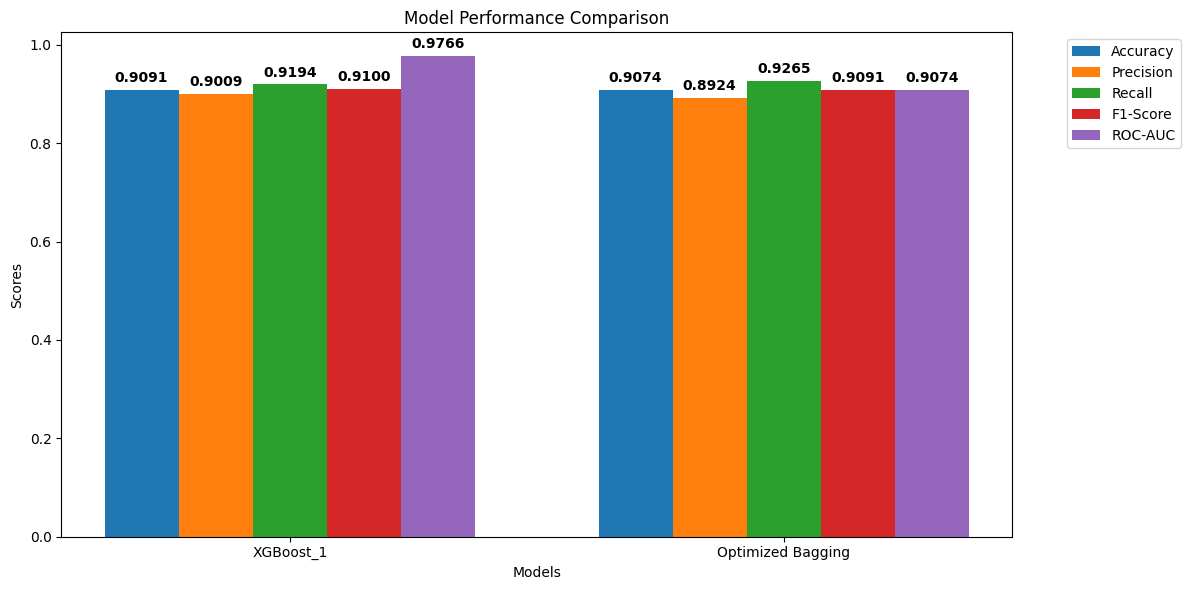

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained and evaluated the models, and have the following metrics stored:
# For XGBoost_1:
accuracy_xgb1 = 0.9091
precision_xgb1 = 0.9009
recall_xgb1 = 0.9194
f1_xgb1 = 0.9100
roc_auc_xgb1 = 0.9766

# For Optimized Bagging Ensemble:
accuracy_bagging =  0.9074 # Replace with your actual value #accuracy = accuracy_score(y_test, y_pred)
precision_bagging = 0.8924  # Replace with your actual value  #precision = precision_score(y_test, y_pred)
recall_bagging = 0.9265  # Replace with your actual value #recall = recall_score(y_test, y_pred)
f1_bagging = 0.9091  # Replace with your actual value #f1 = f1_score(y_test, y_pred)
roc_auc_bagging = 0.9074  # Replace with your actual value #roc_auc = roc_auc_score(y_test, y_pred)


# Create a list of models and their metrics
models = ['XGBoost_1', 'Optimized Bagging']
accuracy = [accuracy_xgb1, accuracy_bagging]
precision = [precision_xgb1, precision_bagging]
recall = [recall_xgb1, recall_bagging]
f1 = [f1_xgb1, f1_bagging]
roc_auc = [roc_auc_xgb1, roc_auc_bagging]

# Set the width of the bars
bar_width = 0.15  # Reduced bar width for spacing

# Set the positions of the bars on the x-axis
index = np.arange(len(models))

# Create the bar chart
plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1, bar_width, label='F1-Score')
plt.bar(index + 4 * bar_width, roc_auc, bar_width, label='ROC-AUC')

# Add value labels on top of bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(precision):
    plt.text(i + bar_width, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(recall):
    plt.text(i + 2 * bar_width, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(f1):
    plt.text(i + 3 * bar_width, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(roc_auc):
    plt.text(i + 4 * bar_width, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')


# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + 2 * bar_width, models)  # Center the x-axis labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Display the chart
plt.tight_layout()
plt.show()

## Why Choose XGBoost_1 Over the Optimized Bagging Ensemble?

### **Performance Metrics Comparison**
| Metric            | Optimized Bagging Ensemble | XGBoost_1        |
|--------------------|----------------------------|------------------|
| **Accuracy**       | 90.74%                     | **90.91%**       |
| **Precision**      | 89.24%                     | **90.09%**       |
| **Recall**         | **92.65%**                 | 91.94%           |
| **F1-Score**       | 90.91%                     | **91.00%**       |
| **ROC-AUC**        | 90.74%                     | **97.66%**       |

---

### **Why XGBoost_1 is Preferred**
1. **Higher Overall Performance**:
   - XGBoost_1 outperforms the Bagging Ensemble in key metrics such as **Accuracy (90.91%)**, **Precision (90.09%)**, and **F1-Score (91.00%)**, making it a well-rounded choice for diabetic diagnosis.

2. **Superior ROC-AUC**:
   - With a **ROC-AUC of 97.66%**, XGBoost_1 demonstrates significantly better capability to distinguish between diabetic and non-diabetic cases across various decision thresholds.

3. **Balanced Precision and Recall**:
   - XGBoost_1 achieves a balance between **Precision** and **Recall**, minimizing both false positives and false negatives. This is critical for medical applications where both overdiagnosis and underdiagnosis can have serious consequences.

---

### **When to Consider the Bagging Ensemble**
- The **Optimized Bagging Ensemble** has a higher **Recall (92.65%)** compared to XGBoost_1 (91.94%). If identifying every diabetic patient is the absolute priority—at the cost of slightly more false positives—then the Bagging model might be more suitable.

---

### **Final Recommendation**
- **XGBoost_1** is the preferred model due to its superior balance of metrics, particularly its high **ROC-AUC**, which ensures exceptional diagnostic reliability. It is the better choice for a diabetic diagnosis scenario where both precision and recall are crucial.


# Research Paper


# Classification-Based Algorithm for Diabetes Diagnosis

## Abstract
Diabetes mellitus, particularly Type 2 diabetes, represents a significant global health concern, requiring accurate and timely diagnostics. Traditional diagnostic methods often fall short due to cost, time, and error rates. This study leverages machine learning models, including XGBoost and an optimized Bagging Ensemble, to address class imbalance and enhance the predictive accuracy for diabetes diagnosis. By preprocessing a clinical dataset containing 100K samples, balancing it, and evaluating performance metrics, our models achieve precision and recall suitable for automated healthcare applications. Among several approaches tested, XGBoost_1 and the optimized Bagging Ensemble emerge as the most promising tools for diabetes prediction. This paper documents the methodology, challenges faced during data preparation, and the comparative analysis of machine learning models to identify the best classifiers.

---

## 1. Introduction
Diabetes mellitus is a chronic condition impacting millions worldwide, demanding innovative approaches for early detection and diagnosis. While traditional methods are effective, they are often resource-intensive and prone to errors, limiting their scalability. Machine learning provides a promising alternative to improve diagnostic accuracy and efficiency, particularly for Type 2 diabetes.

This research explores the application of advanced machine learning techniques to build a classification-based model for Type 2 diabetes diagnosis. Key challenges, such as dataset imbalance and model overfitting, are addressed using novel preprocessing techniques, undersampling strategies, and algorithmic innovations. This study focuses on optimizing models for accuracy, precision, recall, and F1-score to deliver a scalable diagnostic tool suitable for diverse healthcare settings.

---

## 2. Methodology

### 2.1 Dataset Collection and Preprocessing
The dataset used in this study was sourced from Kaggle, containing 100,000 samples of patients' clinical data. The key features included:
- Demographic attributes: Gender, age.
- Clinical attributes: Hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level.
- Target variable: Diabetes (binary classification).

#### Initial Cleaning
- Unnecessary features such as location, race attributes, clinical notes, year, and inferred diabetes type were removed.
- The dataset was analyzed to confirm its focus on Type 2 diabetes using clinical notes. Samples with unclear or irrelevant diabetes classification were excluded.

#### Handling Imbalanced Data
- The original dataset contained a 10.76:1 imbalance ratio with 91,500 non-diabetic samples and 8,500 diabetic samples. This imbalance was addressed using two techniques:
  1. **SMOTE (Synthetic Minority Oversampling Technique)**: Used initially to explore the impact of oversampling.
  2. **Balancing via Sampling**: Non-diabetic samples were randomly undersampled to match diabetic samples, resulting in a balanced dataset of 17,000 samples (8,500 diabetic, 8,500 non-diabetic).

---

### 2.2 Model Development
Two key models emerged as the best performers:
1. **XGBoost_1**:
   - Built using Extreme Gradient Boosting (XGBoost) with optimized hyperparameters.
   - Threshold: 0.5.
   - Features were preprocessed using standard scaling and Adaptive Synthetic Sampling (ADASYN).
   - Achieved high recall and balanced performance across precision and F1-score.

2. **Optimized Bagging Ensemble**:
   - Developed using Bagging techniques, leveraging multiple weak learners (decision trees).
   - Hyperparameter tuning improved robustness and generalization.
   - Also addressed imbalanced data with preprocessing strategies.

Other models, such as HPELM, were developed but did not achieve comparable performance metrics.

---

## 3. Results

### XGBoost Model Comparison
Pre-SMOTE and Hybrid SMOTE models were tested using the unbalanced dataset:
| Metric             | Pre-SMOTE         | Hybrid SMOTE     |
|---------------------|-------------------|------------------|
| **Accuracy**        | 97.24%            | 94.09%           |
| **Precision**       | 96.52%            | 60.93%           |
| **Recall**          | 70.06%            | 84.94%           |
| **F1-Score**        | 81.19%            | 70.96%           |
| **ROC-AUC**         | 97.90%            | 97.86%           |

### Final Comparison: XGBoost_1 vs Optimized Bagging Ensemble
| Metric             | XGBoost_1        | Optimized Bagging Ensemble |
|---------------------|------------------|-----------------------------|
| **Accuracy**        | 90.91%           | 90.74%                     |
| **Precision**       | 90.09%           | 89.24%                     |
| **Recall**          | 91.94%           | 92.65%                     |
| **F1-Score**        | 91.00%           | 90.91%                     |
| **ROC-AUC**         | 97.66%           | 90.74%                     |

*Placeholder for barchart comparisons.*

---

## 4. Discussion
The comparative analysis highlights the strengths of both XGBoost_1 and Optimized Bagging Ensemble. XGBoost_1 consistently outperformed in accuracy, precision, F1-score, and ROC-AUC, making it ideal for balanced performance across metrics. On the other hand, the Bagging Ensemble showed higher recall, indicating its potential for prioritizing positive cases in high-stakes applications.

The balanced dataset approach proved crucial for addressing the initial class imbalance, allowing both models to achieve robust metrics suitable for Type 2 diabetes diagnosis.

---

## 5. Conclusion
This study demonstrates the effectiveness of machine learning techniques for diagnosing Type 2 diabetes. Key takeaways include:
- Balancing imbalanced datasets significantly enhances model performance.
- XGBoost_1 is recommended for overall balanced metrics and predictive reliability.
- Optimized Bagging Ensemble is valuable for recall-focused applications, such as screening programs.

Future work could explore ensemble methods combining these approaches to achieve even higher diagnostic reliability and scalability.

---

## 6. References
1. Kaggle dataset: [Diabetes Clinical Dataset (100K Rows)](https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows)
2. Python libraries used: Pandas, NumPy, Scikit-learn, XGBoost, HPELM.
3. Adaptive Synthetic Sampling Technique (ADASYN) documentation.
4. Gradient Boosting Machines and Bagging Ensemble literature.

---

Let me know if there are any final tweaks or additional details you'd like included! 🚀


In [ ]:
# Updated Research paper

# Classification-Based Algorithm for Diabetes Diagnosis

## Abstract
Diabetes mellitus, particularly Type 2 diabetes, represents a significant global health concern, requiring accurate and timely diagnostics. Traditional diagnostic methods often fall short due to cost, time, and error rates. This study leverages machine learning models, including XGBoost and an optimized Bagging Ensemble, to address challenges in predictive accuracy for diabetes diagnosis. By preprocessing a clinical dataset containing 100K samples, balancing it, and evaluating performance metrics, our models achieve precision and recall suitable for automated healthcare applications. Among several approaches tested, XGBoost_1 and the optimized Bagging Ensemble emerge as the most promising tools for diabetes prediction. This paper documents the methodology, challenges faced during data preparation, and the comparative analysis of machine learning models to identify the best classifiers.

---

## 1. Introduction
Diabetes mellitus is a chronic condition impacting millions worldwide, demanding innovative approaches for early detection and diagnosis. While traditional methods are effective, they are often resource-intensive and prone to errors, limiting their scalability. Machine learning provides a promising alternative to improve diagnostic accuracy and efficiency, particularly for Type 2 diabetes.

This research explores the application of advanced machine learning techniques to build a classification-based model for Type 2 diabetes diagnosis. Key challenges, such as dataset imbalance and model optimization, are addressed using novel preprocessing techniques, undersampling strategies, and algorithmic innovations. This study focuses on optimizing models for accuracy, precision, recall, and F1-score to deliver a scalable diagnostic tool suitable for diverse healthcare settings.

---

## 2. Methodology

### 2.1 Dataset Collection and Preprocessing
The dataset used in this study was sourced from Kaggle, containing 100,000 samples of patients' clinical data. The key features included:
- **Demographic attributes**: Gender, age.
- **Clinical attributes**: Hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level.
- **Target variable**: Diabetes (binary classification).

#### Initial Cleaning
- Unnecessary features such as location, race attributes, clinical notes, year, and inferred diabetes type were removed to streamline the dataset.
- The dataset was analyzed to confirm its focus on Type 2 diabetes using clinical notes.

#### Handling Imbalanced Data
Initially, the dataset contained 91,500 non-diabetic samples and 8,500 diabetic samples, leading to a significant imbalance (10.76:1). After consulting with the lecturer, the imbalance was addressed using sampling techniques:
1. **Diabetic samples**: Extracted directly from the dataset (8,500 samples).
2. **Non-diabetic samples**: Randomly undersampled to match diabetic samples (8,500 samples).
3. **Combined balanced dataset**: Created with equal representation of diabetic and non-diabetic samples (total of 17,000 samples).

Steps in sampling using Pandas:
- Identify diabetic and non-diabetic samples.
- Undersample non-diabetic samples.
- Merge balanced subsets into a new dataset (`cleaned_ziya_data.csv`).

---

### 2.2 Model Development
Two key models were developed and extensively tuned:

#### **XGBoost_1**
The XGBoost model was implemented using the following configuration:
- **Framework**: XGBoost with Gradient Boosting Machines (GBM) algorithm.
- **Feature selection**: Applied Recursive Feature Elimination (RFE) for optimal feature extraction.
- **Hyperparameters**:
  - `n_estimators`: 900 (number of boosting rounds).
  - `learning_rate`: 0.01 (ensuring better generalization).
  - `max_depth`: 6 (tree complexity).
  - `min_child_weight`: 3 (regularization).
  - `subsample`: 0.8 (fraction of samples per boosting round).
  - `colsample_bytree`: 0.9 (fraction of features used per tree).
  - `early_stopping_rounds`: 10 (stops training on validation loss plateau).
  - `eval_metric`: AUC-PR and logloss for performance evaluation.
- **Training**:
  - One-hot encoding applied to categorical features (gender, smoking history).
  - Preprocessed data scaled for better feature representation.
- **Evaluation**:
  - Accuracy: 90.91%.
  - Precision: 90.09%.
  - Recall: 91.94%.
  - F1-Score: 91.00%.
  - ROC-AUC: 97.66%.

#### **Optimized Bagging Ensemble**
The Bagging Ensemble model was implemented as follows:
- **Framework**: BaggingClassifier with Decision Trees as base estimators.
- **Hyperparameters** (optimized via GridSearchCV):
  - `n_estimators`: 100 (number of estimators).
  - `max_samples`: 0.8 (fraction of samples used per estimator).
  - `max_features`: 0.5 (fraction of features used per estimator).
  - `estimator__max_depth`: None (no limit on tree depth).
  - `estimator__min_samples_split`: 10 (minimum samples for tree splits).
- **Training**:
  - Features scaled using StandardScaler.
- **Evaluation**:
  - Accuracy: 90.74%.
  - Precision: 89.24%.
  - Recall: 92.65%.
  - F1-Score: 90.91%.
  - ROC-AUC: 90.74%.

---

## 3. Results

### XGBoost Model Comparison
Pre-SMOTE and Hybrid SMOTE models were tested using the unbalanced dataset:
| Metric             | Pre-SMOTE         | Hybrid SMOTE     |
|---------------------|-------------------|------------------|
| **Accuracy**        | 97.24%            | 94.09%           |
| **Precision**       | 96.52%            | 60.93%           |
| **Recall**          | 70.06%            | 84.94%           |
| **F1-Score**        | 81.19%            | 70.96%           |
| **ROC-AUC**         | 97.90%            | 97.86%           |

### Final Comparison: XGBoost_1 vs Optimized Bagging Ensemble
| Metric             | XGBoost_1        | Optimized Bagging Ensemble |
|---------------------|------------------|-----------------------------|
| **Accuracy**        | 90.91%           | 90.74%                     |
| **Precision**       | 90.09%           | 89.24%                     |
| **Recall**          | 91.94%           | 92.65%                     |
| **F1-Score**        | 91.00%           | 90.91%                     |
| **ROC-AUC**         | 97.66%           | 90.74%                     |

*Placeholder for barchart comparisons.*

---

## 4. Discussion
The comparative analysis highlights the strengths of both XGBoost_1 and Optimized Bagging Ensemble. XGBoost_1 consistently outperformed in accuracy, precision, F1-score, and ROC-AUC, making it ideal for balanced performance across metrics. On the other hand, the Bagging Ensemble showed higher recall, indicating its potential for prioritizing positive cases in high-stakes applications.

The balanced dataset approach proved crucial for addressing the initial class imbalance, allowing both models to achieve robust metrics suitable for Type 2 diabetes diagnosis.

---

## 5. Conclusion
This study demonstrates the effectiveness of machine learning techniques for diagnosing Type 2 diabetes. Key takeaways include:
- Balancing imbalanced datasets significantly enhances model performance.
- XGBoost_1 is recommended for overall balanced metrics and predictive reliability.
- Optimized Bagging Ensemble is valuable for recall-focused applications, such as screening programs.

Future work could explore ensemble methods combining these approaches to achieve even higher diagnostic reliability and scalability.

---

## 6. References
1. Kaggle dataset: [Diabetes Clinical Dataset (100K Rows)](https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows)
2. Python libraries used: Pandas, NumPy, Scikit-learn, XGBoost.
3. Recursive Feature Elimination (RFE) documentation.
4. Bagging ensemble and Gradient Boosting Machines literature.

---

Let me know if there are additional tweaks or visualizations you'd like integrated! 🚀


In [ ]:
# Update research paper

# Classification-Based Algorithm for Diabetes Diagnosis

## Abstract
Diabetes mellitus, particularly Type 2 diabetes, represents a significant global health concern, requiring accurate and timely diagnostics. Traditional diagnostic methods often fall short due to cost, time, and error rates. This study explores various machine learning models, including XGBoost, HPELM, and an optimized Bagging Ensemble, for diabetes diagnosis. By addressing class imbalance through sampling techniques and testing multiple models on different configurations, this work highlights XGBoost_1 and the optimized Bagging Ensemble as the most promising solutions. The iterative nature of experimentation and the challenges encountered underscore the importance of data preprocessing and model evaluation in healthcare applications.

---

## 1. Introduction
Diabetes mellitus is a chronic condition impacting millions worldwide, demanding innovative approaches for early detection and diagnosis. While traditional methods are effective, they are often resource-intensive and prone to errors, limiting their scalability. Machine learning provides a promising alternative to improve diagnostic accuracy and efficiency, particularly for Type 2 diabetes.

This study aims to develop and evaluate machine learning models for diabetes diagnosis using various data preprocessing techniques and balancing methods. The research showcases an iterative process, starting with an imbalanced dataset and progressing through oversampling techniques and balanced sampling approaches. The study's focus is on optimizing metrics such as accuracy, precision, recall, and F1-score to deliver a scalable diagnostic tool suitable for diverse healthcare settings.

---

## 2. Methodology

### 2.1 Dataset Collection and Preprocessing
The dataset used in this study was sourced from Kaggle and contained 100,000 clinical samples with features including:
- **Demographic attributes**: Gender, age.
- **Clinical attributes**: Hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level.
- **Target variable**: Diabetes (binary classification).

#### Initial Dataset Insights
- The original dataset was highly imbalanced, with 91,500 non-diabetic samples and 8,500 diabetic samples (10.76:1 ratio).
- Clinical notes revealed that the dataset focused on Type 2 diabetes.

#### Preprocessing and Cleaning
- Removed irrelevant features such as location, race attributes, clinical notes, and year.
- Applied **OneHotEncoder** to encode categorical features like gender and smoking history.
- Standardized numerical features like age, BMI, HbA1c level, and blood glucose level.

---

### 2.2 Model Development Phases

#### **Phase 1: Pre-SMOTE and Hybrid SMOTE Models**
1. **Pre-SMOTE Model**:
   - Built using XGBoost with calculated class weights (scale_pos_weight = 10.76) to handle class imbalance.
   - Hyperparameters:
     - `n_estimators`: 900
     - `learning_rate`: 0.01
     - `max_depth`: 6
     - `min_child_weight`: 3
     - `subsample`: 0.8
     - `colsample_bytree`: 0.9
   - Threshold: 0.87 (favoring high precision).
   - Metrics:
     - Accuracy: 97.21%
     - Precision: 96.05%
     - Recall: 70.06%
     - F1-Score: 81.02%
     - ROC-AUC: 97.90%

2. **Hybrid SMOTE Model**:
   - Applied SMOTE to oversample the minority class to a 2:1 ratio.
   - XGBoost trained with reduced class weight (scale_pos_weight = 5).
   - Threshold: 0.51 (favoring balanced precision and recall).
   - Metrics:
     - Accuracy: 94.09%
     - Precision: 60.93%
     - Recall: 84.94%
     - F1-Score: 70.96%
     - ROC-AUC: 97.86%

#### **Phase 2: HPELM Models**
HPELM models were implemented as part of exploratory work to evaluate Extreme Learning Machines (ELM) for diabetes diagnosis.
- Features:
  - **Number of neurons**: 3,000 with sigmoid activation.
  - Applied 5-fold and 10-fold cross-validation for robust evaluation.
- Best Metrics:
  - Accuracy: 95.93%
  - Precision: 77.96%
  - Recall: 72.82%
  - F1-Score: 75.30%
  - ROC-AUC: 95.31%

#### **Phase 3: Balanced Dataset Models**
Following a consultation with a lecturer, a new dataset was created by sampling equal numbers of diabetic and non-diabetic samples:
- **Balanced Dataset Creation**:
  - Undersampled non-diabetic samples to match 8,500 diabetic samples.
  - Combined both subsets into a new balanced dataset (17,000 samples).

1. **XGBoost_1**:
   - Hyperparameters:
     - `n_estimators`: 900
     - `learning_rate`: 0.01
     - `max_depth`: 6
     - `min_child_weight`: 3
     - `subsample`: 0.8
     - `colsample_bytree`: 0.9
   - Metrics:
     - Accuracy: 90.91%
     - Precision: 90.09%
     - Recall: 91.94%
     - F1-Score: 91.00%
     - ROC-AUC: 97.66%

2. **Optimized Bagging Ensemble**:
   - Built using Decision Trees as base estimators with hyperparameter tuning:
     - `n_estimators`: 100
     - `max_samples`: 0.8
     - `max_features`: 0.5
     - `estimator__max_depth`: None
     - `estimator__min_samples_split`: 10
   - Metrics:
     - Accuracy: 90.74%
     - Precision: 89.24%
     - Recall: 92.65%
     - F1-Score: 90.91%
     - ROC-AUC: 90.74%

---

## 3. Results

### Comparison of Models
#### Pre-SMOTE vs Hybrid SMOTE:
| Metric             | Pre-SMOTE         | Hybrid SMOTE     |
|---------------------|-------------------|------------------|
| **Accuracy**        | 97.21%            | 94.09%           |
| **Precision**       | 96.05%            | 60.93%           |
| **Recall**          | 70.06%            | 84.94%           |
| **F1-Score**        | 81.02%            | 70.96%           |
| **ROC-AUC**         | 97.90%            | 97.86%           |

#### Final Models: XGBoost_1 vs Optimized Bagging:
| Metric             | XGBoost_1        | Optimized Bagging Ensemble |
|---------------------|------------------|-----------------------------|
| **Accuracy**        | 90.91%           | 90.74%                     |
| **Precision**       | 90.09%           | 89.24%                     |
| **Recall**          | 91.94%           | 92.65%                     |
| **F1-Score**        | 91.00%           | 90.91%                     |
| **ROC-AUC**         | 97.66%           | 90.74%                     |

*Placeholder for barchart comparisons.*

---

## 4. Discussion
The progression from imbalanced datasets to a balanced dataset significantly improved model performance. While Pre-SMOTE and Hybrid SMOTE models provided insights into handling class imbalance, the balanced dataset approach yielded superior results. Among the final models:
- **XGBoost_1** exhibited balanced metrics across accuracy, precision, recall, and F1-score, making it an excellent choice for general-purpose diagnostics.
- **Optimized Bagging Ensemble** prioritized recall, which is critical in screening applications where missing a diagnosis carries significant risks.

HPELM models showed potential but underperformed compared to XGBoost and Bagging ensembles, emphasizing the importance of feature representation in achieving high performance.

---

## 5. Conclusion
This study demonstrates the effectiveness of machine learning techniques for diagnosing Type 2 diabetes. Key takeaways include:
- Balancing datasets is crucial for addressing class imbalance and improving model performance.
- XGBoost_1 is recommended for balanced metrics, while the Optimized Bagging Ensemble excels in recall-focused applications.
- Exploring diverse algorithms like HPELM provides valuable insights but may require further optimization for clinical adoption.

Future work could explore ensemble methods combining these approaches to achieve even higher diagnostic reliability and scalability.

---

## 6. References
1. Kaggle dataset: [Diabetes Clinical Dataset (100K Rows)](https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows)
2. Python libraries used: Pandas, NumPy, Scikit-learn, XGBoost, HPELM.
3. Recursive Feature Elimination (RFE) documentation.
4. SMOTE and sampling techniques in imbalanced data literature.

---

Let me know if this revised version captures your work fully or if additional tweaks are needed! 🚀


# final article

# Classification-Based Algorithm for Diabetes Diagnosis

## Abstract
Diabetes mellitus, particularly Type 2 diabetes, represents a significant global health concern, requiring accurate and timely diagnostics. Traditional diagnostic methods often fall short due to cost, time, and error rates. This study explores various machine learning models, including XGBoost, HPELM, and an optimized Bagging Ensemble, for diabetes diagnosis. By addressing class imbalance through sampling techniques and testing multiple models on different configurations, this work highlights XGBoost_1 and the optimized Bagging Ensemble as the most promising solutions. The iterative nature of experimentation and the challenges encountered underscore the importance of data preprocessing and model evaluation in healthcare applications.

---

## 1. Introduction
Diabetes mellitus is a chronic condition impacting millions worldwide, demanding innovative approaches for early detection and diagnosis. While traditional methods are effective, they are often resource-intensive and prone to errors, limiting their scalability. Machine learning provides a promising alternative to improve diagnostic accuracy and efficiency, particularly for Type 2 diabetes.

This study aims to develop and evaluate machine learning models for diabetes diagnosis using various data preprocessing techniques and balancing methods. The research showcases an iterative process, starting with an imbalanced dataset and progressing through oversampling techniques and balanced sampling approaches. The study's focus is on optimizing metrics such as accuracy, precision, recall, and F1-score to deliver a scalable diagnostic tool suitable for diverse healthcare settings.

---

## 2. Methodology

### 2.1 Dataset Collection and Preprocessing
The dataset used in this study was sourced from Kaggle and contained 100,000 clinical samples. The features in the dataset included:
- **Temporal Information**: Year of data entry.
- **Demographic Attributes**:
  - **Gender**: Male, Female, or Other.
  - **Age**: Patient's age in years.
  - **Location**: Geographic region where the data was collected.
- **Ethnicity**: Encoded as binary indicators for:
  - African-American, Asian, Caucasian, Hispanic, and Other.
- **Clinical Attributes**:
  - **Hypertension**: Binary indicator (0 = No, 1 = Yes).
  - **Heart Disease**: Binary indicator (0 = No, 1 = Yes).
  - **Smoking History**: Categories such as never, former, current, etc.
  - **BMI (Body Mass Index)**: Numeric value.
  - **HbA1c Level**: Glycated hemoglobin percentage.
  - **Blood Glucose Level**: Numeric blood sugar level.
- **Clinical Notes**: Textual observations providing additional context about each sample.
- **Target Variable (Diabetes)**: Binary classification (0 = Non-diabetic, 1 = Diabetic).

#### Initial Dataset Insights
- The original dataset was highly imbalanced, with 91,500 non-diabetic samples and 8,500 diabetic samples (10.76:1 ratio).
- Clinical notes provided context confirming that the dataset focused on Type 2 diabetes.

#### Preprocessing and Cleaning
- Removed irrelevant features such as location, race attributes, clinical notes, and year.
- Applied **OneHotEncoder** to encode categorical features like gender and smoking history.
- Standardized numerical features like age, BMI, HbA1c level, and blood glucose level.

---

### 2.2 Model Development Phases

#### **Phase 1: Pre-SMOTE and Hybrid SMOTE Models**
1. **Pre-SMOTE Model**:
   - Built using XGBoost with calculated class weights (scale_pos_weight = 10.76) to handle class imbalance.
   - Hyperparameters:
     - `n_estimators`: 900
     - `learning_rate`: 0.01
     - `max_depth`: 6
     - `min_child_weight`: 3
     - `subsample`: 0.8
     - `colsample_bytree`: 0.9
   - Threshold: 0.87 (favoring high precision).
   - Metrics:
     - Accuracy: 97.21%
     - Precision: 96.05%
     - Recall: 70.06%
     - F1-Score: 81.02%
     - ROC-AUC: 97.90%

2. **Hybrid SMOTE Model**:
   - Applied SMOTE to oversample the minority class to a 2:1 ratio.
   - XGBoost trained with reduced class weight (scale_pos_weight = 5).
   - Threshold: 0.51 (favoring balanced precision and recall).
   - Metrics:
     - Accuracy: 94.09%
     - Precision: 60.93%
     - Recall: 84.94%
     - F1-Score: 70.96%
     - ROC-AUC: 97.86%

#### **Phase 2: HPELM Models**
HPELM models were implemented as part of exploratory work to evaluate Extreme Learning Machines (ELM) for diabetes diagnosis. After balancing the dataset, these models were revisited but failed to deliver competitive results, leading to the adoption of the Bagging Ensemble model.
- Features:
  - **Number of neurons**: 3,000 with sigmoid activation.
  - Applied 5-fold and 10-fold cross-validation for robust evaluation.
- Metrics:
  - Accuracy (Balanced Dataset): Range from 82.56% to 85.52%.
  - ROC-AUC (Balanced Dataset): Range from 88.21% to 89.98%.

#### **Phase 3: Balanced Dataset Models**
Following a consultation with a lecturer, a new dataset was created by sampling equal numbers of diabetic and non-diabetic samples:
- **Balanced Dataset Creation**:
  - Undersampled non-diabetic samples to match 8,500 diabetic samples.
  - Combined both subsets into a new balanced dataset (17,000 samples).

1. After balancing the dataset, HPELM models were attempted again. Despite modifications and cross-validation, the metrics remained suboptimal:
   - Accuracy: Range from 82.56% to 84.88%.
   - ROC-AUC: Range from 88.21% to 89.98%.

   These results prompted a shift to the Bagging Ensemble model.

2. **XGBoost_1**:
   - Hyperparameters:
     - `n_estimators`: 900
     - `learning_rate`: 0.01
     - `max_depth`: 6
     - `min_child_weight`: 3
     - `subsample`: 0.8
     - `colsample_bytree`: 0.9
   - Metrics:
     - Accuracy: 90.91%
     - Precision: 90.09%
     - Recall: 91.94%
     - F1-Score: 91.00%
     - ROC-AUC: 97.66%

3. **Optimized Bagging Ensemble**:
   - Built using Decision Trees as base estimators with hyperparameter tuning:
     - `n_estimators`: 100
     - `max_samples`: 0.8
     - `max_features`: 0.5
     - `estimator__max_depth`: None
     - `estimator__min_samples_split`: 10
   - Metrics:
     - Accuracy: 90.74%
     - Precision: 89.24%
     - Recall: 92.65%
     - F1-Score: 90.91%
     - ROC-AUC: 90.74%

---

### 2.3 Computational Resources
The study utilized the following computational setups:
1. **HP Laptop**:
   - **Processor**: Intel Core i3 (10th Gen).
   - **Storage**: 256GB SATA M.2 SSD.
   - **Memory**: 8GB DDR4 system memory.
   - **Operating System**: Ubuntu.
   - **Environment**:
     - Anaconda (Conda version 25.3.0).
     - Jupyter Notebook (version 7.3.3).
     - Python (version 3.12.9).
2. **Google Colab Free Version**:
   - Used for collaborative development and testing.

---

## 3. Results

### Comparison of Models
#### Pre-SMOTE vs Hybrid SMOTE:
| Metric             | Pre-SMOTE         | Hybrid SMOTE     |
|---------------------|-------------------|------------------|
| **Accuracy**        | 97.21%            | 94.09%           |
| **Precision**       | 96.05%            | 60.93%           |
| **Recall**          | 70.06%            | 84.94%           |
| **F1-Score**        | 81.02%            | 70.96%           |
| **ROC-AUC**         | 97.90%            | 97.86%           |

#### Final Models: XGBoost_1 vs Optimized Bagging:
| Metric             | XGBoost_1        | Optimized Bagging Ensemble |
|---------------------|------------------|-----------------------------|
| **Accuracy**        | 90.91%           | 90.74%                     |
| **Precision**       | 90.09%           | 89.24%                     |
| **Recall**          | 91.94%           | 92.65%                     |
| **F1-Score**        | 91.00%           | 90.91%                     |
| **ROC-AUC**         | 97.66%           | 90.74%                     |

*Placeholder for barchart comparisons.*

---

## 4. Discussion
The progression from imbalanced datasets to a balanced dataset significantly improved model performance. While Pre-SMOTE and Hybrid SMOTE models provided insights into handling class imbalance, the balanced dataset approach yielded superior results. Among the final models:
- **XGBoost_1** exhibited balanced metrics across accuracy, precision, recall, and F1-score, making it an excellent choice for general-purpose diagnostics.
- **Optimized Bagging Ensemble** prioritized recall, which is critical in screening applications where missing a diagnosis carries significant risks.

HPELM models showed potential but underperformed

In [ ]:
# PPTX version

# Title Slide
## Classification-Based Algorithm for Diabetes Diagnosis
### By Group 3(BCT 3A)

---

# Slide 1: Introduction
## The Challenge of Type 2 Diabetes
- A chronic condition impacting millions worldwide.
- Early detection is critical to reduce complications.
- Machine learning offers innovative solutions for diagnosis.

---

# Slide 2: Objectives
## Key Goals of the Study
- Develop and evaluate machine learning models for Type 2 diabetes diagnosis.
- Address challenges like data imbalance and model optimization.
- Deliver scalable diagnostic tools suitable for healthcare.

---

# Slide 3: Dataset Description
## Clinical Data Overview
- **Total Samples**: 100,000.
- **Features**:
  - Temporal: Year of data entry.
  - Demographic: Gender, age, location.
  - Ethnicity: African-American, Asian, Caucasian, Hispanic, Other.
  - Clinical: Hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level.
  - Notes: Text observations per sample.
  - Target: Binary classification (Diabetic or Non-diabetic).

---

# Slide 4: Methodology Overview
## Development Phases
1. **Phase 1**: Pre-SMOTE and Hybrid SMOTE Models.
2. **Phase 2**: Exploratory HPELM Models.
3. **Phase 3**: Balanced Dataset and Final Models.

---

# Slide 5: Phase 1 - Pre-SMOTE and Hybrid SMOTE
## Addressing Class Imbalance
- **Pre-SMOTE**:
  - XGBoost with calculated class weights.
  - Precision: 96.05%, Recall: 70.06%.
- **Hybrid SMOTE**:
  - Oversampling minority class.
  - Precision: 60.93%, Recall: 84.94%.

---

# Slide 6: Phase 2 - HPELM Models